# Assessment 3 - Skeleton Code

In [2]:
# load python libraries
import numpy as np
import pandas as pd
import re
import os
from bs4 import BeautifulSoup     # pulls data out of XML and HTML files
# from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
!pip install wget
import wget
import nltk

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=cb8eb566504ee8bcfe35eb4c64444a6415460384e955acdcd4dc8aca259ba38d
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [1]:
!pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Dataset/DL_Assignment_3/AmazonReviews.csv"  # Update this path
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

Mounted at /content/drive


NameError: name 'pd' is not defined

In [ ]:
data=df

In [ ]:
# see how many entries there are
print(data['Text'].shape)

In [ ]:
# limit the data for this exercise otherwise it will take too long to train
# let's limit the data from 100,000 to 10,000
#data = data[:100000]
print(data['Text'].shape)

In [ ]:
data.head()

In [7]:


# Display some of the data
data[['Score','Text','Summary']].sample(5)

,Score,Text,Summary
406998,5,my little 8 month old shih tzu absolutely lives for these treats !<br />she waits by the cupboard and scratches at it for her next one ...<br />they smell delicious from a human standpoint as well...,the best treats ever !
10122,5,These microwave pork rinds are absolutely the BEST available. Any bag of pork rinds you buy in a store are not as good. The only place I've seen their equal is the ones that are cooked fresh at fa...,Best Pork Rinds Available
408496,2,"Expressed disappointment with product. Was advertised as ""diced"" but ended up being large ""chunks"". When I contacted the vendor, they acknowleded the wording was in error and refunded me my paym...",Figs
453609,1,It says it was delivered on the 22nd i have not received any items!! Please cancel and refund my order or re-issue me another one! i have not received anything!,did not recieve item
358771,2,"I love drinking Zico's coconut water. In camparison to all others, I find ZICO's is the closest to fresh coconut water speaking from experience as I'm from an Island which frequently have coconut...",ZICO WATER IS GOOD BUT NOT IN A PLASTIC CONTAINER!


In [8]:
# Remove any duplicate entries in the data
data.drop_duplicates(subset=['Text'],inplace=True)
data.dropna(axis=0,inplace=True)

In [9]:
labels = data['Score']
labels[labels<4] = 0
labels[labels>1] = 1


In [10]:
# map words to colloquial terms
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [11]:
# print out the first 10 entries in the data to view it to decide what to do for data cleaning
data['Text'][:10]

,Text
0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
5,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there wa..."
6,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, ..."
7,This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!
8,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too
9,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


In [12]:
!pip install nltk

In [13]:
import nltk
nltk.download('stopwords')  # donload the stopwords library for use by NLTK
stop_words = set(stopwords.words('english'))

# create a function to clean the text.  Remove whiteapce, html characters, punctuation etc...
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)
    return (" ".join(long_words)).strip()

# store the cleaned text in a list
cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# create a function to clean the summary text
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:
            newString=newString+i+' '
    return newString

# Call the summary_cleaner function and store the cleaned summaries in a list
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(summary_cleaner(t))

# store the cleaned text and summaries in a dictionary
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
# drop rows with null values
data.dropna(axis=0,inplace=True)

In [15]:
# add the text _START_ and _END_ to the summaries to easily identify they are the summaries
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [16]:
# print the first 5 reviews and their summaries
for i in range(5):
    print("Review:",data['cleaned_text'][i])
    print("Summary:",data['cleaned_summary'][i])
    print("Score:",data['Score'][i])
    print("\n")

Review: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Summary: _START_ good quality dog food  _END_
Score: 1


Review: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Summary: _START_ not as advertised  _END_
Score: 0


Review: confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
Summary: _START_ delight says it all  _END_
Score: 1


Review: looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal
Summary: _START_ cough medicine  _END_
Score: 0


Review: great taffy great price wide assortment

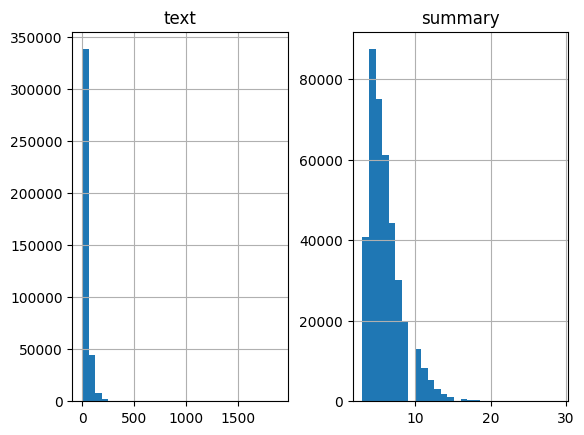

In [17]:
# investigate the distribution of the length of the text in the data
# to help fix the max length of the sequence
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [18]:
# from histograms, decide on a text review length of 80 and a summary length of 10
max_len_text=80
max_len_summary=10

# split the data into train and test sets
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(data['cleaned_text'],data['Score'],test_size=0.1,random_state=0,shuffle=True)

In [19]:
#prepare a tokenizer for reviews on training data
max_words = 500    # the maximum number of words to keep, based on word frequency (size of the vocabulary)

x_tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr)
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post')
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [20]:
print(x_tr[1])

[ 11  83   2 423 156  61   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0]


# LSTM Model with 1 Layer

In [21]:
# create the model
model = Sequential()
model.add(Embedding(x_voc_size,output_dim=500, input_length=80,trainable=False))
model.add(LSTM(500, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:

# Fit the model
original_model=model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 131s 47ms/step - accuracy: 0.7794 - loss: 0.5282 - val_accuracy: 0.7804 - val_loss: 0.5278
Epoch 2/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 140s 47ms/step - accuracy: 0.7797 - loss: 0.5271 - val_accuracy: 0.7804 - val_loss: 0.5256
Epoch 3/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - accuracy: 0.7797 - loss: 0.5262 - val_accuracy: 0.7804 - val_loss: 0.5263
Epoch 4/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - accuracy: 0.7788 - loss: 0.5272 - val_accuracy: 0.7781 - val_loss: 0.5283
Epoch 5/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - accuracy: 0.7804 - loss: 0.5241 - val_accuracy: 0.8311 - val_loss: 0.3850
Epoch 6/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 143s 47ms/step - accuracy: 0.8402 - loss: 0.3586 - val_accuracy: 0.8548 - val_loss: 0.3281
Epoch 7/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 130s 47ms/step - accuracy: 0.8587 - loss: 0.3234 - val_accuracy: 0.8604 - val_loss: 0.3178
Epoch 8/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 143s 47ms/step - accuracy: 

In [26]:
history= original_model

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 80, 500)             │      57,235,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 500)                 │       2,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,337,389 (241.61 MB)

 Trainable params: 2,034,129 (7.76 MB)

 Non-trainable params: 57,235,000 (218.33 MB)

 Optimizer params: 4,068,260 (15.52 MB)

## Accuracy and Loss Plot

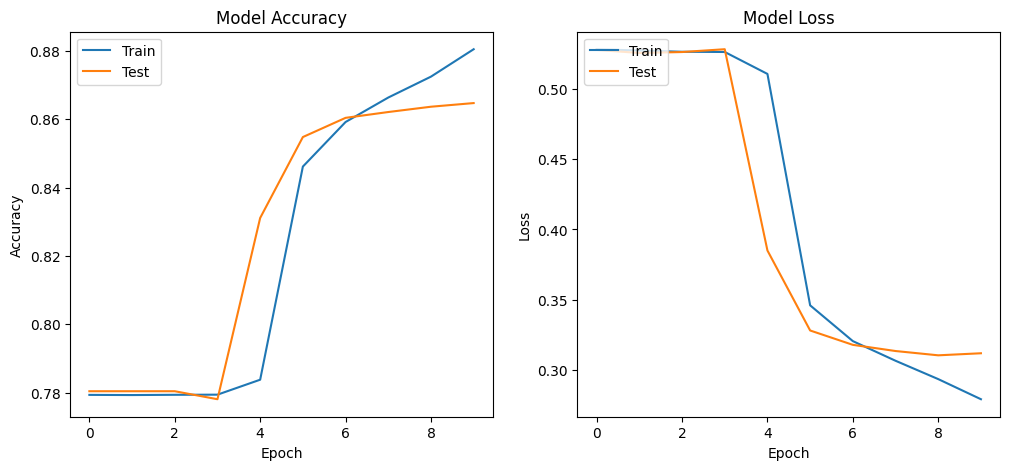

In [27]:
# Plot accuracy & loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization # Import Dropout here
from tensorflow.keras.layers import LSTM, Embedding, Dense,GRU Dropout, Flatten
# Hyperparameters (Tuned)
max_words = 8000
max_len_text = 100

In [ ]:
# Tokenization and padding
x_tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
x_tokenizer.fit_on_texts(data['cleaned_text'])
x_seq = x_tokenizer.texts_to_sequences(data['cleaned_text'])
x_pad = pad_sequences(x_seq, maxlen=max_len_text, padding='post')

In [ ]:
# Train-test split
x_tr, x_val, y_tr, y_val = train_test_split(x_pad, data['Score'], test_size=0.1, random_state=0)

# LSTM Model with 2 Layer

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - accuracy: 0.7958 - loss: 0.4867 - val_accuracy: 0.8797 - val_loss: 0.2912
Epoch 2/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 46s 17ms/step - accuracy: 0.8862 - loss: 0.2750 - val_accuracy: 0.8882 - val_loss: 0.2665
Epoch 3/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9004 - loss: 0.2415 - val_accuracy: 0.8966 - val_loss: 0.2528
Epoch 4/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9104 - loss: 0.2188 - val_accuracy: 0.8969 - val_loss: 0.2526
Epoch 5/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 46s 17ms/step - accuracy: 0.9183 - loss: 0.2008 - val_accuracy: 0.8972 - val_loss: 0.2575
Epoch 6/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9297 - loss: 0.1761 - val_accuracy: 0.8931 - val_loss: 0.2693
Validation Accuracy: 89.31%


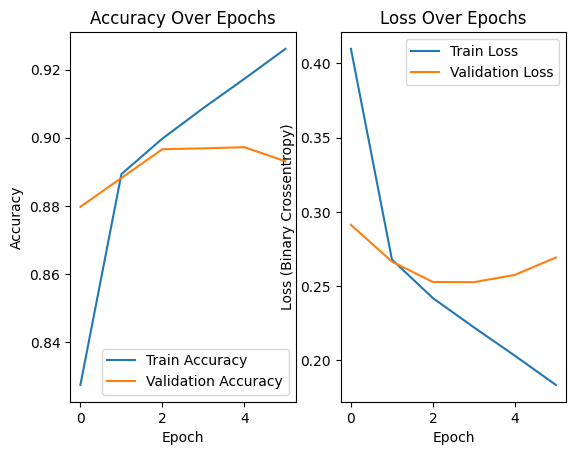

In [49]:
# Model with 2-layer LSTM
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len_text))
model.add(LSTM(128, return_sequences=True))  # First LSTM layer
model.add(Dropout(0.2))                     # Dropout for regularization
model.add(LSTM(64))                         # Second LSTM layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(x_tr, y_tr,validation_data=(x_val, y_val),epochs=10, batch_size=128, callbacks=[early_stop], verbose=1)
# Evaluate
scores = model.evaluate(x_val, y_val, verbose=0)
print(f"Validation Accuracy: {scores[1]*100:.2f}%")

## Accuracy & Loss Plot

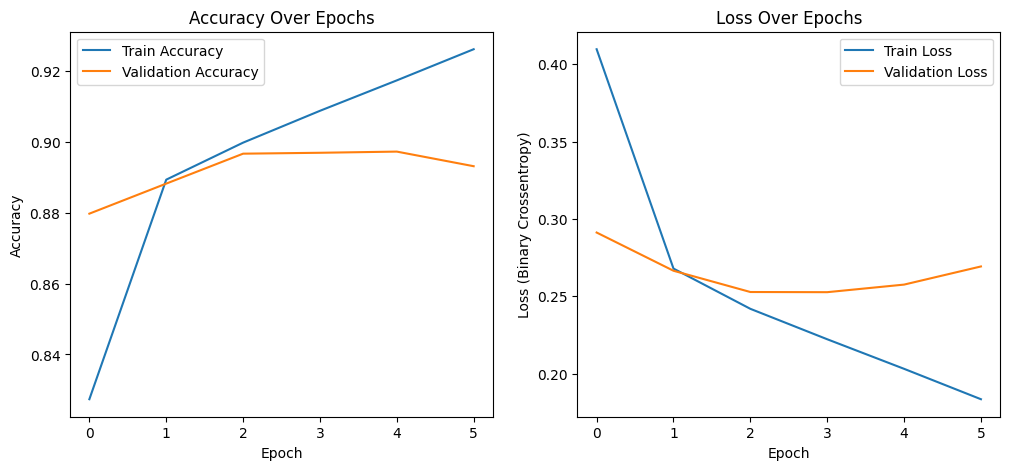

In [50]:
# Plot accuracy & loss
plt.figure(figsize=(12, 5))
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()


In [55]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization # Import Dropout here
from tensorflow.keras.layers import LSTM, Embedding, Dense,GRU, Dropout, Flatten

In [ ]:
# Hyperparameters
max_words = 8000      # Vocabulary size
max_len_text = 100    # Max review length

In [ ]:
# Tokenization and padding
x_tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
x_tokenizer.fit_on_texts(data['cleaned_text'])
x_seq = x_tokenizer.texts_to_sequences(data['cleaned_text'])
x_pad = pad_sequences(x_seq, maxlen=max_len_text, padding='post')

In [ ]:
# Train-test split
x_tr, x_val, y_tr, y_val = train_test_split(x_pad, data['Score'], test_size=0.1, random_state=0)

# GRU Model with 2 Layer

In [56]:

# Model with 2-layer GRU
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len_text))
model.add(GRU(128, return_sequences=True))  # First GRU layer
model.add(Dropout(0.2))
model.add(GRU(64))                         # Second GRU layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Early Stopping
early_stop = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
# Train the model
history = model.fit(x_tr, y_tr,validation_data=(x_val, y_val),epochs=10,batch_size=128,callbacks=[early_stop],verbose=1)



# Evaluate
scores = model.evaluate(x_val, y_val, verbose=0)
print(f"Validation Accuracy: {scores[1]*100:.2f}%")

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.7979 - loss: 0.4837 - val_accuracy: 0.8945 - val_loss: 0.2600
Epoch 2/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.8992 - loss: 0.2438 - val_accuracy: 0.8987 - val_loss: 0.2489
Epoch 3/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - accuracy: 0.9119 - loss: 0.2144 - val_accuracy: 0.8996 - val_loss: 0.2466
Epoch 4/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - accuracy: 0.9246 - loss: 0.1865 - val_accuracy: 0.8972 - val_loss: 0.2544
Epoch 5/10
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 83s 16ms/step - accuracy: 0.9362 - loss: 0.1591 - val_accuracy: 0.8936 - val_loss: 0.2841
Validation Accuracy: 89.96%


## Accuracy & Loss Plot

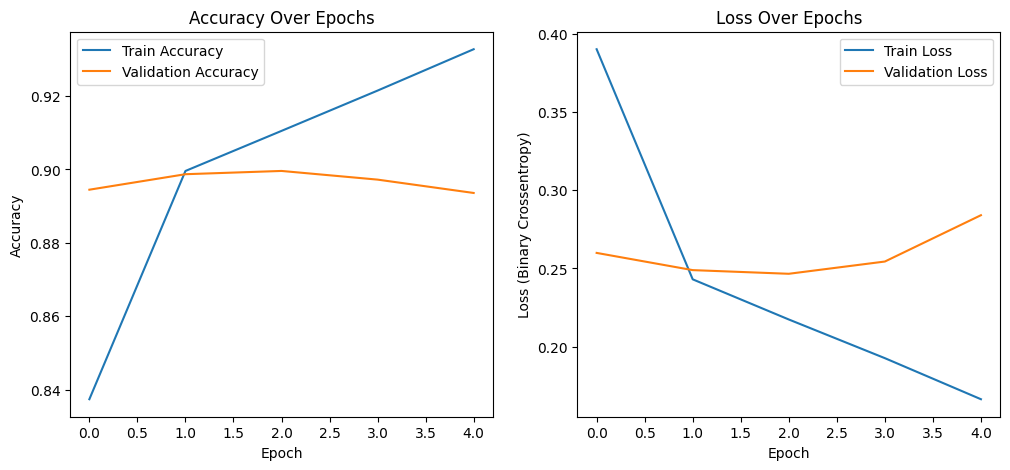

In [57]:
# Plot accuracy & loss
plt.figure(figsize=(12, 5))
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
